# Pymaceuticals Inc.
---

### Analysis Observations:

1.In reference to the bar chart of mice per drug regimen, there are 10 treatments used for the study. The highest number of mice in the study are treated using Capomulin. while the lowest number of mice in the study are treated using Propriva.

2.In reference to the box plot across four regimens of interest & summary statistics table, the final tumor volume treated by Capomulin and Ramicane trended lower than the others. Ramicane demonstrated lower final tumor volume, however it was used with a lower treatment than that of Capomulin. Fair results require equal treatments and variables.

3.Capolmulin was used to treat Mouse ID l509 and the tumor volume seems to decrease with time. Sampling also charts that five mice treated with the same regimen supports the assumption that Capomulin could reduce the size of tumor volume.

4.In reference to the correlation between Capomulin with average weight and final tumor volume, the value is 0.84, meaning that there is a strong positive correlation between the two variables. The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of a mouse.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_data = pd.merge(mouse_metadata, study_results, how='right')


# Display the data table for preview
Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = Combined_data.loc[Combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]




summary_stats_table = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_sem})

summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

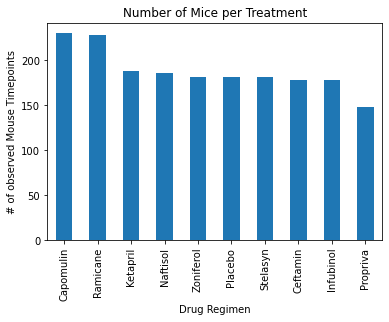

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Number of Mice per Treatment")

plt.show()


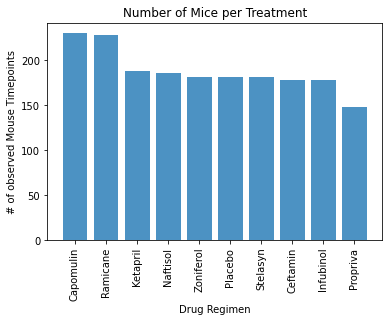

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()


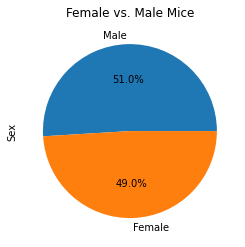

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

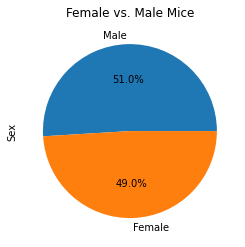

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds
    
    
by_mouse = Combined_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(Combined_data,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = Combined_data[Combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

    
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
# for drug in drug_list:
    #print(drug)
    
    
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

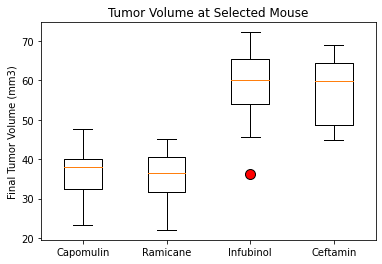

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

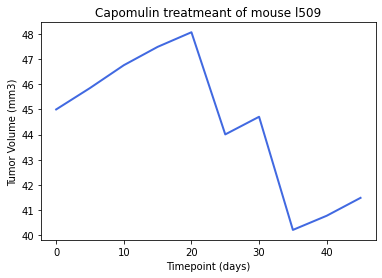

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show() 
#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAEWCAYAAABhffzLAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAAA5b0lEQVR4nO3dd5hU5dn48e+9s2VmO2VBEFcUQQWWDoJIEbsiKNZYYveNpmhMYmLi+8YU359vKjGagi0au1EBUWNDigpK71UQpJdl+2yd+/fHOQvDZtkdlp2ddn+ua66dOWfOOfecmb3nmec8RVQVY4wxiSMp0gEYY4xpW5b4jTEmwVjiN8aYBGOJ3xhjEowlfmOMSTCW+I0xJsFY4jetQkRmicjt7v3rReT9SMeUiETkLhHZLSJlItIh0vEcKxH5SkTOjXQc8cYSfxQQketEZKH7z7pTRN4VkbMiHVdLqeoLqnp+S7YVkYdE5PnWjilo/91FREUkOVzHaKljjU1EUoA/AOeraqaq7m/dCCNLRG4WkTr3/6T+NjZofXsReVNEykVki4hc12D720Vko7vdv0Wka1u/hmhhiT/CROQ+YDLwv0BnIB/4CzAxgmFFLXHY57ZxnQEvsCrSgYTRPPdLrf42K2jd40A1znm4HviriPQBEJExOP9jE4H2wGbgpTaNPJqoqt0idANygDLgqiaeMwyYBxQBO4HHgNSg9Qp8D9gE7AN+CyS565KAB4EtwB7gOSDHXdfd3fYW4GvgAPAtYCiw3D3eY0HHeQh4Puhx/fbJ7uNZwO3u/ZuBTxrE+C1gg3ucxwFp5LVeiPOPW+Oel2VB+34Y+BTwA6cApwEfAIXAOuDqoP1cAiwBStzX9lDQuq1uPGXubYQb76fAH93XvQk4013+tXvubgraRxrwO3dfu4G/AT53XTtgBrDXfa0zgG5B284CfuUerxR4H+h4pNgaOUdpOAWFHe5tsrusF1AetP3MRrY92ve8qc/PWGBbg/1/BZwb9Lld6L4Hu4E/BD1vOPCZe7xlwNgmPv/B+7yZoM9Vg+dl4Hx2egUt+yfwiHv/d8DjQeu6uueiR6TzQCRuEQ8gkW84ia4WN3ke4TmD3X+UZPcfdw1wb9B6BT7GKcXkA+s5lIBvBTYCJwOZwBvAP9119UngbzilxPOBSmAq0Ak43v1nH+M+/yGOLfHPAHLdGPcCFx7h9R52nKB9bwX6uOchBydx3eI+HoTzpdfHff5YoAAncfVzE89ljcUdFG+tuz8P8Gv3eI/jJNXzcZJ0pvv8ycB095xnAW8B/89d1wG4Akh3170GTG3wWr7ESdQ+9/EjR4qtkfPzS2C++x7l4STQX4WyfQve86Y+P2NpOvHPA25072cCw937xwP7gYvd9+c893HeEWIO3ufNOF9u+3A+5//Noc/fQMDfYNsfAm+5938P/CVo3fHuuZgY6TwQiVvEA0jkG87P0V1Huc29wJtBj5WgJArcDXzk3v8IuDto3ak4pen6LxEFjg9avx+4Jujx67hfMhx74j8r6PGrwE+O8PoOO07Qvn8Z9PgaYG6D5/wd+PkR9jkZ+GNjcQfFuyHocYH7nM4Nzs0AQNzk0yNo3Qhg8xGOPQA40OC1PNjg/fr3kWJrZH9fAhcHPb4A+CqU7Vvwnjf1+RlL04l/DvAL3F8zQc/5Me6XR9Cy9wj6RdXEPk8GTsL5wigAVgMPuOtG0eB/CbgDmOXePwfnC6Mfzhfu34EA8I2j/b+Nh5vVlUbWfqBjUxfzRKSXiMwQkV0iUoJTT9mxwdO+Drq/BednLO7fLQ3WJePUgdbbHXTf38jjzFBeSAh2Bd2vaMF+g1/jicAZIlJUf8P5Ej0OQETOEJGPRWSviBTjVGc0PGcNNXzdqGpj5yIPpzS/KOjY/3aXIyLpIvJ39+JiCU4CzBURT9C+juVcNPaeHu1FylDf81A+P0dyG86vmrUiskBExrvLTwSuavDenQV0aW6HqrpJVTerakBVV+D8+rnSXV0GZDfYJBvnlxqq+hHwc5wvti04XyilwLYQXkvcscQfWfNwfmpf1sRz/gqsBXqqajbwU5xSZ7ATgu7n49T94v49scG6Wg7/Rw9VOU7Cq3dcC/YRCg1h+dfAbFXNDbplqupd7voXcapiTlDVHJyqDWlkPy2xDyc59gk6do6q1ifLH+CUjM9w36/R7vKG71ljQomtsfd0xxGee6ya+vwc9nlwv9jy6h+r6gZV/QZOFdL/Af8SkQyc9+6fDd67DFV9pAXxKYfO63ogWUR6Bq3vT9CFblV9XFV7qmonnC+AZGBlC44b8yzxR5CqFgP/AzwuIpe5pcUUEblIRH7jPi0L5wJZmYicBtzVyK5+JCLtROQE4B7gFXf5S8D3ReQkEcnE+bXwiqrWtiDcpcBoEckXkRzggRbsIxS7ge7NtNyZAfQSkRvd85UiIkNF5HR3fRZQqKqVIjIMCG7WtxfnJ/7JLQlOVQPAE8AfRaQTgIgcLyIXBB3bDxSJSHucUmaoQontJeBBEckTkY44n59wNX9t6vOzHvCKyCVuM9IHca6HACAiN4hInnu+itzFdW6sl4rIBSLiERGviIwVkW7NBeP+X3R275+GU8c/DUBVy3GuQfxSRDJEZCROC55/us/3ikhft1VYPjAF+JOqHjjWkxSLLPFHmKr+AbgP5x9nL06J6Ds4F9zAuUB1Hc7P0ic4lNSDTQMW4STnt4Gn3OVP43zw5+A0X6sEvtvCOD9wj73cPdaMluwnBK+5f/eLyOIjxFKKc2HyWpxS6S6cUmV94rkbJwGU4iTGV4O2rcBtIeRWNQxvQYw/xrnoOd+tzvkQp5QPzvUEH84vg/k41UAhCTG2X+O0llkOrAAWu8vC4YifH7fQcjfwJLAd5xdAcLXJhcAqESkD/gRcq6qVqvo1TkL+KYc+7z8itFx0DrBcRMqBd3AS/f8Grb8b59zvwfnSuktV60v8XpxfgmXAFzi/tv871BMRb8S98GFilIgoTjXQxkjHYoyJDVbiN8aYBGOJ3xhjEoxV9RhjTIKxEr8xxiSYqBuhsDEdO3bU7t27RzoMY4yJKYsWLdqnqnkNl8dE4u/evTsLFy6MdBjGGBNTRGRLY8utqscYYxKMJX5jjEkwlviNMSbBWOI3xpgEY4nfGGMSjCV+Y4xJMJb4jTEmwYQ98btjbi8RkRnu4wEiMl9ElorIQne8dGPaTFlFgNc+KuGXT+5jT2FLpiYwJra1RQeue3AmCK+fFu03wC9U9V0Rudh9PLYN4jAJbuvuGt6cVcp788uprHLGqMrJSuKea9pHODJj2lZYS/zurDqX4EzWUE859CWQQ/imjTOGQED5YpWfnzy2h5t/sZNps8uorFJO654KwNwlFdQFbKBCk1jCXeKfDNyPMx1dvXuB90TkdzhfPGc2tqGI3AncCZCfnx/WIE388VcGeO/zct6cVcrXu53qnNQU4bxh6Vw+NouTuqZww//sYOf+OlZ+WUX/nt4IR2xM2wlb4heR8cAeVV0kImODVt0FfF9VXxeRq3GmCTy34faqOgVnXkyGDBliRTITkh37apk2u5R3Piuj3O98bPJyPUwck8klIzPJyfQcfO6YQem8/EEpc5ZUWOI3CSWcJf6RwAS3Ht8LZIvI88ClOPX+4Myv+uQRtjcmJKrK0vVVvPFxKZ+t8FM/xUTfHmlMOjuLUf19eDzyH9uNHlif+P18+0olKek/n2NMPApb4lfVB4AHANwS/w9V9QYRWQOMAWYB44AN4YrBxLeq6gAfLajgjVmlbNpeA0BKMpw9OINJZ2fRKz+1ye1PPTGV4zp42LW/jlWbqig4xUr9JjFEYljmO4A/iUgyUIlbj29MqPYeqGXanDJmfFJGSXkAgHbZSUwYlcWlozJpn+1pZg8OEWH0wHRe/bCU2YsrLPGbhNEmiV9VZ+GU8FHVT4DBbXFcEz9UlVWbqnnj41LmLK0g4OR7Ts1PZdLZWYwdnE5K8tFX1YwZ5CT+OUv93G3VPSZBxMRELCZx1dQqsxZV8MbHpazbWg1AUhKcPdhpndPn5FREWp6sTzsxlU7tPewprGP15mr69khrrdCNiVqW+E1UKiyp4625Zbw1t5TCEqd4n52RxPizMpk4OpO8dq3z0RURxgxM57WPSpm9pMISv0kIlvhNVFm/1anO+XhROTXuaAond01h0tlZnDM0nbTU1u9zOGaQk/jnLK7grkm5Vt1j4p4lfhNxdXXK3GV+3vi4lJVfVgEgAiP7+5g0NosBvdKOqTqnOaedmEperoe9RXWs3VJN75Os1G/imyV+EzHFZXW8/WkZ02aXsbeoDoAMn3DxmZlcNiaLLh3b5uOZlCSMHpTO6zOd1j2W+E28s8Rv2tzmHU51zodfVFBV4/S2OqFzMpPGZnH+GRn4vG0/WviYgW7iX1LBtyblhvUXhjGRZonftJnte2p4cnoxsxdXHFw2rI+XSWOzGHK6N6J1671PSqVjrtO6Z+1X1ZxupX4Txyzxm7A7UFrHc+8UM2NuGXUBZ7C0i87M4PKxWeR3Tol0eIBb3TPAxxuzypi9pMISv4lrlvhN2PgrA7w2s5RXPijBX6UkCVw0IoObx+e0WnPM1jRmULqT+BdX8F+XW3WPiV/R999nYl5tnfL2p2U8904xB9w2+MP7ernjslxO6tr0+DmR1OfkNDrkeNhdWMe6LdWc1t1K/SY+WeI3rUZVmbvUz5PTiti2x2mEf3r3VO68PDcmhj1OShJGD/Tx5qwy5iypsMRv4pYlftMqlm+sZMqbRaze7Ayr0K1TMrdPzGXUAF9MVZmMHpjOm251zx2XWXWPiU+W+M0x+WpnDU9MLWLeCj/gjJL5zYtzuGRkJsmNjIEf7fr2SKN9dhI799ex4euaZod2NiYWWeI3LbL3QC3/mFHMe/PLCSh404Rrzs3m6nOyItIOv7V4koRRA9OZNruMWYsrLPGbuGSJ3xyVsooAL71fwusfl1Jdo3iSYOKoTG68OCfkcfCj3Vg38c9ZUsEdE3OsusfEHUv8JiTVNcq0OaW88O+Sg5OfjBmUzm0TcujWKTra4reWvqek0S47iR17a9m4rYaeJ1ip38SXsCd+EfEAC4HtqjpeRF4BTnVX5wJFqjog3HGYlgkElI8WVPD0W0XsLnTG0+nfM407L8/l9Dht9eJJEkb1T2f6XOciryV+E2/aosR/D7AGyAZQ1WvqV4jI74HiNojBtMCC1X6emFrExm3OfLYndU3hjom5nNHXG/fVH2MGHUr8t02w6h4TX8Ka+EWkG3AJ8DBwX4N1AlyNM+G6iSLrt1bzxNQiFq2tBCAv18Mtl+Zw3hkZeBJkrPp+p6SRm5nE9r21bNpeQ49uVuo38SPcJf7JwP1AViPrRgG7VXVDYxuKyJ24E7Hn5+eHKz4TZOe+Wp6aXsTMhc4gahk+4foLcrh8bGZYJkCJZh6PMGpAOm994rTuscRv4knY/ptFZDywR1UXHeEp3wBeOtL2qjpFVYeo6pC8vLywxGgcxWV1PPbaAW76xQ5mLqwgJRmuOieLF37ZlWvPz064pF9vzKB0AGYvrkBVIxyNMa0nnCX+kcAEEbkY8ALZIvK8qt4gIsnAJGBwGI9vmlFZHeD1maW8/H4J5ZWKCJw3LJ1bLs3luA7W4Kt/zzRyMpPYtseqe0x8Cdt/t6o+ADwAICJjgR+q6g3u6nOBtaq6LVzHN0dWV6e8O6+cZ98uZn+x01JnWG9nEDVLbod4PMJZ/X28/Wk5c5ZYdY+JH5Eq1l1LE9U8JjxUlc+WO4OobdnlDKLWK98ZRG3QqdE/iFokjBmUztufljN7cQU3j7fWPSY+tEniV9VZwKygxze3xXHNIVt31/D7FwpZsdGZzLxLx2Rum5DD2EHpEZ35KtoN7OUlOyOJrbtr+WpnTVQPK21MqKwiN87VBZQ3Pi7lqenFVNcoOZlJ3HhRDpeOyiQl2RJ+czwe4awBPt5xS/2W+E08sMQfx7bvreE3zxWy4kunlH/B8Ay+fWU7MtMTs5VOS40ZmO4k/iV+bh6fG+lwjDlmlvjjUCCgTJ9bxpQ3i6isVtpnJ/GD6zswosAX6dBi0sBTneqeLTtr+GpnDd27xNfYRCbxWOKPM7v21/Lb5/ezZJ1Tyj9naDrfuaodOZnxMXJmJCR7hJH9fLw7z6nu6X5JTqRDMuaY2G/+OKGqzPikjNt+vZMl66rIzUzioTs68rNbOlrSbwWj3c5cc5ZURDgSY46dlfjjwN4DtfzuhUIWrHbG1hk90Me917YnN8sSfmsZdKqXTJ+weUcNW3fVkH+cVfeY2GUl/himqrw3v4xbf72TBasryc5I4sFbO/Dz2zta0m9lKcnCyP6HhnAwJpZZ4o9RhcV1PPi3ffzfc4WU+5URBT6eerAL44ZkWCejMAkeu8eYWGZVPTFGVZm5sII/v3qAkvIAGT7hO1e14/wzLOGH2+DTvGT4hE07ati6u4b8zlbdY2KTlfhjSFFpHb94ch8PP7OfkvIAQ3t7efrBLlwwPNOSfhtISRZG9nMv8lqp38QwS/wxYs6SCm791U7mLPHjSxPuu649j3w7j7x29qOtLR2s7rHWPSaGWdaIciXldTz6yoGDk6MM6JXG/Td2sGGTI2TwaV4yvMKX22rYtqcm7iaaN4nBSvxRbN4KP7f+aiczF1bgTRW+d007fve9Tpb0Iyg1RRjRz+kBbdU9JlZZ4o9CZRUB/u+5/fzsr3spLAlQ0CONJ356HJeNybKRNKNAfXXPLKvuMTHKio5RZsFqP797vpC9RXWkpgi3Tchh0tlZCTPJeSwYerqPdK+w8esatu+t4fg8q+4xsSWkxC8iQ3AmR+8K+IGVwIeqWhjG2BJKRWWAv75+gLc/LQfg9O6p/PibHayHaBRKTRHOLPDx4YIKZi+u4LoLbOweE1uarOoRkZtFZDHOFIo+YB2wBzgL+EBEnhWR/Gb24RGRJSIyI2jZd0VknYisEpHfHPvLiG1L1lVy26938van5aQkw+0Tc3j0B50t6Uex0QPrx+7xRzgSY45ecyX+DGCkqjb66RaRAUBPYGsT+7gHWANku9ucDUwE+qlqlYh0Otqg44W/KsATU4uYOrsMgJ4npPCTmzrYZB8xYGhvL740Yf3Wanbsq6VrR6s1NbGjyRK/qj5+pKTvrl+qqh8dab2IdAMuAZ4MWnwX8IiqVrn72HN0IceHFRsrueN/dzF1dhmeJLh5fA6P33+cJf0YkZaadHB+A2vdY2JNc1U9IiJXi8hV7v1zRORREblbREJpETQZuB8IBC3rBYwSkc9FZLaIDD3Cse8UkYUisnDv3r2hvp6oV1Xt1OXf+8c97Nhby8ldU/jLj4/jmxfnkOyxC7ixpL66xzpzmVjT3O/Tx4FOQCpO9Uwa8BZwMXAqTjVOo0RkPLBHVReJyNgGx2wHDAeGAq+KyMmqqsHbq+oUYArAkCFDDlsXq9ZsruKR5/bz9e5akgSuuyCbGy/OITXFEn4sOqOPF2+asG5LNbv211r/ChMzmvukjlLVAhFJAXYBXVS1WkReBJY0s+1IYIKIXAx4gWwReR7YBrzhJvovRCQAdATip1jfQHWN8uzbxbzyQQkBhfzOyfz4pg6c3j0t0qGZY5CWmsSIvj4+XuS07rnmvOxIh2RMSJqrrqkFUNUaYIGqVruPa4G6pjZU1QdUtZuqdgeuBWaq6g3AVGAcgIj0wvk1se8YXkNUW7Wpim89souX3i9BgavPzWLKT7tY0o8TNnaPiUXNlfh3iUimqpap6oX1C0XkOKC6hcd8GnhaRFa6+7ipYTVPPCjzB3hqWhHT55ahCsfnJfPjb3agbw9L+PFkWB8v3lRh7VdW3WNiR5OfUlW96AirSoDxoR5EVWcBs9z71cANoW4bi+YureDRVw6wv7gOTxJcc342N16UTVqqjZARb7ypSZzR18fsxRXMXVrBVedYdY+JfiEXT0SkH9C9wTZvtHZAsWzvgVoeffUAny5zWsCe3j2V+65rT49u1kQzno0ZlM7sxU49vyV+EwtCHbLhaaAfsIpDTTMVS/wA1AWUt+aW8eS0IioqFV+acPvEXCaMzrQxdhLAGX28pKUIqzdXs6ewlk7trbrHRLdQP6HDVbV3WCOJUZu2V/OHFwtZvdm55HFmPx/fu7qd/fMnEF9aEmf09TJniZ85Syu4cpyV+k10CzU7zROR3qq6OqzRxJCq6gDPv1vCyx+UUBeADjkevnt1O0YN8Nk0iAlozMB05izxM3uxJX4T/UJN/M/iJP9dQBUggKpqv7BFFsUWr6vkjy8Wsn1vLQATRmVy+2W5ZPrs4m2iGt7XR2qKsGpTNXsP1NqUmCaqhfrpfBq4EVjB4cMvJJTisjr+9kYR7813hk4+sUsKP7iuvTXRNPi8SQzr7eWTZX7mLKngCiv1mygWauLfqqrTwxpJFFNVPlpQweP/OkBxWYCUZLjhohyuPS+blGSr1jGOMYPS3cTvt8RvolqoiX+tO0zDWzhVPQCoaty36tmxr5bJLxWycE0lAP17pvH969qT39nGyjeHG1HgIyUZVm6qYl9RLR1zrbrHRKdQP5k+nIR/ftCyuG7OWVenvDazlGdnFFNVo2SlJ/GtSblcOCLDLt6aRqV7kxjWx8enbql/0tlZkQ7JmEaFlPhV9ZZwBxJN1n5VxR9eLGTjthoAxg1J5+4r29E+2xPhyEy0GzMwnU+X+Zm9pMISv4laoXbgOgn4Lg167qrqhPCEFRn+ygBPzyjmzY9LCSgc18HDvde2Z1gfX6RDMzHiYHXPl1XsL66jQ44VFkz0CbWqZyrwFE4df1y26pm/ws/kVwrZU1hHksBV52Rx8/gcfGnWRNOELsOXxNDePj5b7mfu0gouG2OlfhN9Qk38lar6aFgjiZDC4joee+0As9zp83qekMIPru9Ar3wbX8e0zJiB6Xy23OnMZYnfRKNQE/+fROTnwPsc3qpncViiagOBgPLOZ+VMefMAZX7FmyrccmkOk8Zm4bEpEM0xGNHPqe5ZvrGKwpI6uzZkok6oib8ApwPXOA4fpG1cOIIKt627avj9i4Ws2Oh8hw3r4+Xea9vbWOqmVWT6khh8mpf5KyuZu7SCiaOt1G+iS6iZ7nLg5PoZuGJVdY3y0vslvPheMTW10C4riW9f1Y6zB6dbE03TqsYOSmf+ykpmL7bEb6JPqIl/GZAL7DnaA4iIB1gIbFfV8SLyEHAHh+bY/amqvnO0+z1ayzdW8ocXCtm62xlf5+IzM7jz8lyyM+xnuGl9Z/ZLJ9lTyPINVRworaNdln3OTPQINfF3xum9u4DD6/hDac55D7AGCO7D/kdV/V3IUR6DsooAU6YWMeOTMgC6dUrmB9e1p38vb1sc3iSozHSnuufzVZV8srSCS0dZqd9Ej1AT/89bsnMR6QZcAjwM3NeSfbSUqjJ7iZ/HXi2ksCRAsge+cX4211+YQ2qKVeuY8BszKJ3PVznVPZb4TTRpMvGLiKhjdnPPOcLqycD9QMNP/XdE5Js4VUA/UNUDjez3TuBOgPz8/KbCbJS/Svnzq4UcKAnQt0ca913Xnu5dbHwd03ZG9k/H80IhS9dXUVRaR65V95go0VzvpI9F5LsicljmFZFUERknIs8CNzW2oYiMB/ao6qIGq/4K9AAGADuB3ze2vapOUdUhqjokLy8vhJdyuHRvEvdc0557r23H5O93sqRv2lyWW90TUPjEnYfZmGjQXOK/EKgDXhKRHSKyWkQ2ARuAb+DU1f/jCNuOBCaIyFfAy8A4EXleVXerap2qBoAngGGt8UIaM3pgOhNGZ5Fk896aCBkzKB2A2W4HQWOiQZOJX1UrVfUvqjoSOBE4Bxikqieq6h2qurSJbR9Q1W6q2h24FpipqjeISJegp10OrDzmV2FMlBrZ34cnCZasr6S4rC7S4RgDNF/iP0hVa1R1p6oWHeMxfyMiK0RkOXA28P1j3J8xUSs7w8Og07wEAlbdY6JHm4xApqqzVHW8e/9GVS1Q1X6qOkFVd7ZFDMZEyuiBVt1joosNPWlMmJ3V30dSEixeF73VPWUVgaiNzbS+kBO/iJwoIue6930iYg2TjQlBTqaHgb2c6p7PlkdXdU9xWR1/f+MAVz6wnVt+uZMyf1yOum4aCCnxi8gdwL+Av7uLuuGM0W+MCUG0te4p9wd49u1irv+fHbzyYSnVNUpRWYCFq6Pri8mER6gl/m/jNM8sAVDVDUCncAVlTLypr+5ZtLaSkvLIValUVQd45YMSrv+fHTz7djEVlcrQ3l4uHpkBwGcrLPEnglCHbKhS1er6ESxFJBlnWGZjTAhyszwM6JnG4nVVfLbcz4UjMtv0+DW1yjuflfH8uyXsL3a+eAp6pHHrhBz69/SydVcN73xazherKqmrU5uTIs6Fmvhni8hPAZ+InAfcjTMNozEmRGMGpbN4XRWzF1e0WeKvCygffVHOs28Xs3O/k/BPOSGF2ybkMqy39+Bw5Cd0Tub4vGS2761l9eYqCk6xQQzjWaiJ/yfAbcAK4L+Ad4AnwxWUMfHorAHp/OnlAyxaW0lZRYDM9PA1qlNV5i7188yMYrbsrAEgv3Myt1yay6gBvv/ozS4iDC/w8frMUuat8Fvij3MhJf6g4RWeCG84xsSvdlke+vVMY+n6Kj5bXsH5w1u/1K+qLFxTyVPTi1m/1Zk36bgOHm66JIdzh2Y0WYUzoj7xr6zkzstbPTQTRUJK/O6Aa7/CGbYhGRBAVTW7yQ2NMYcZMyidpeurmLW49RP/8o1Owq+fUrR9dhI3XpTDxSMzSUluvs6+oEcaGV5hy84aduyrpWtHm4o0XoX6zk4GJgErmhiC2RjTjFED0nn0Fbe6xx8g03fs1T3rt1bz9FtFfLGqEoDsjCSuPS+by8Zm4k0Nff8pycLQ3j5mLa5g/go/k862rjrxKtTE/zWw0pK+McemfbaHfqeksWyD07rn/DMyWryvLTtreGZGEXOWOE0wfWnCVedkceU52S3+Qhle4CT+eZb441qoif9+4B0Rmc3hUy/+ISxRGRPHxgxKZ9mGKuYsqWhR4t+5r5bn3inmg8/LCSikpggTR2dy3QXZ5GQe22QvZ/TxkiSwbEMl5f4AGa3wi8REn1AT/8NAGeAFUsMXjjHxb/SAdP786gEWrPYfVXLdX1zH8+8W8/anZdTWgScJLj0rkxsuyiYvt3Xq43MyPfQ+OY2VX1axcE3lwR7HJr6E+mlpr6rnhzUSYxJE+xwPBT3SWL6xinkr/Jw7rOlSf3FZHS+/X8LU2WVU1SgicN6wdG4anxuWC7AjCnys/LKK+Sv9lvjjVKifmg9F5HxVfT+s0RiTIEYPTGf5Rqcz15ESf7k/wL9mlvLaRyVUVDqX10YN8HHz+BxO6hq+H97D+3p5YirMX+mnLqB4bAa7uBNq4v82cL+IVAE1WHNOY47J6IE+Hv/XAb5Y7aeiMkC691B1T1V1gGlzynjxvRJKyp3RMof29nLrpTmcemJa2GPr3iWFLh087Nxfx9qvqulzcviPadpWqB24Wnx5X0Q8wEJge/1kLO7yHwK/BfJUdV9L929MLOqYm0zfk9NY8aVT3XPO0Ixmx9NpKyLCiAIfb8wqY94KvyX+OBRqB67RjS1X1TkhbH4PsAY4+OtARE4AzgO2hnJ8Y+LR6IE+VnxZxceLKqgLwLMzipocT6ctDXcT//wVfm6fmNvmxzfhFWpVz4+C7nuBYcAiYFxTG4lIN+ASnFZB9wWt+iNOE9FpIUdqTJwZPTCdx/9VxGfL/QcnaGlqPJ221L+nF1+asGlHDbv213JcB+vFG09Creq5NPixW2L/TQibTsZJ8AerikRkAk61z7JIlGSMiRZ57ZIZ0DONpRuqQh5Pp604vXi9zFniZ/5KP5eNsc5c8aSlX+PbgL5NPcEd32ePqi4SkbHusnTgZ0CzTUNF5E7gToD8/PwWhmlMdPvZrR3ZsLWawad7QxpPpy2NKPAxZ4mfeSss8cebUOv4/8yhiVeSgAHAsmY2GwlMEJGLcaqHsoF/AicB9aX9bsBiERmmqruCN1bVKcAUgCFDhthQESYudcjx0KHAF+kwGjWsjw8RWLq+En9lAJ/XevHGi1BL/AuD7tcCL6nqp01toKoPAA8AuCX+H6rqFcHPEZGvgCHWqseY6NMuy8Pp3VNZvbmahWsrGTXAOnPFi1Dr+J8NdyDGmOgzosDH6s3VzF/ht8QfR5pM/CKygsbn1q3vwNUvlIOo6ixgViPLu4eyvTEmMkYU+HhqejHzV/kJBDSiLY1M62muxD++mfXGmDh2UtcUOrX3sKewjnVbqzm9u3XmigdNXq1R1S31N6ASKHBvfneZMSaO1ffiBZi3wh/haExrCekyvYhcDXwBXAVcDXwuIleGMzBjTHQY0ddJ/PMt8ceNUFv1/AwYqqp7AEQkD/gQ+Fe4AjPGRIcBvbx404SN22rYU1hLp/bWizfWhdowN6k+6bv2H8W2xpgYlpoiDD7NGSRu/kor9ceDUJP3v0XkPRG5WURuBt4G3glfWMaYaHKm1fPHleaac14JzFDVH4nIJOAsnKacU1T1zbYI0BgTeWf0cRL/4nWV+KsC+NLsB38sa+7dux7YKiLPAX7gR6r6fUv6xiSW9jkeTuueSk2tk/xNbGuuOeflwCnAR8D3gK9F5K9HGp/fGBO/6lv3WHVP7Gv295qqlqjqs6p6EU4b/qXAn0Xk63AHZ4yJHvXt+T9fWUkgYOMmxrKQK+pEpB0wCbgGaA+8Hq6gjDHRp0e3FPJyPewvrmPD19WRDsccgyYTv4hkiciNIvIOzvSJQ4FfA/mqem8bxGeMiRIiwnBr3RMXmivxbwYuBP4KnKCqd6rqTFW133nGJCCr548PzXXBy1fVijaJxBgT9QaemkZairDh6xr2FtWSl2u9eGNRc616LOkbYw5KS01ikNuL9/OV1qwzVlkvDGPMUbHROmNfs4lfRDwi8tu2CMYYE/2G93VK/IvXVlJVHYhwNKYlQmnHXwcMFnd29KPlfnEsEZEZ7uNfichyEVkqIu+LSNeW7NcYExkdc5PplZ9KVY2yZF1VpMMxLRBqVc8SYJrbtHNS/S3Ebe/BaQpa77eq2k9VBwAzgP8JPVxjTDSw6p7YFmrib48zFPM44FL31uy0jCLSDbgEeLJ+maqWBD0lg8bn9DXGRLGDiX+lH2vdHXtCaoulqre0cP+TgfuBrOCFIvIw8E2gGDi7sQ1F5E7gToD8/PwWHt4YEw49T0ihQ46HfUV1bNxWQ88TUiMdkjkKoU692E1E3hSRPSKyW0Red0vzTW0zHtijqosarlPVn6nqCcALwHca215Vp6jqEFUdkpeXF0qYxpg2IiIHL/LalIyxJ9SqnmeA6UBX4HjgLXdZU0YCE0TkK+BlYJyIPN/gOS8CV4QcrTEmatRX93xmiT/mhJr481T1GVWtdW//AJoshqvqA6raTVW7A9cCM1X1BhHpGfS0CcDalgRujImsQad5SU0R1m2pprC4LtLhmKMQauLfJyI3uE0zPSJyA87F3pZ4RERWishy4HycVj/GmBjjTU1i0KlpgM3FG2tCTfy3AlcDu4CdwJXuspCo6ixVHe/ev0JV+7pNOi9V1e1HG7QxJjoM73uodY+JHSElflXdqqoTVDVPVTup6mWquiXcwRljolt9Pf+iNZVU11izzlgRUnNOETkJ+C7QPXgbVZ0QnrCMMbEgr10yp3RLYeO2Gpaur2SYOym7iW6hjqk6FXgKpzWPDc5hjDloRIGPjdtqmLfCb4k/RoRax1+pqo+q6seqOrv+FtbIjDExYbj14o05oZb4/yQiPwfeBw6OyqSqi8MSlTEmZpyan0q77CT2FNaxaXsNPbpZL95oF2riLwBuxBmrp76qR93HxpgElpQkDO/j49155cxf6bfEHwNCreq5HDhZVceo6tnuzZK+MQaw0TpjTaiJfxmQG8Y4jDExbPBpXlKSYc1X1RwotV680S7UxN8ZWCsi74nI9PpbOAMzxsQOnzeJgb28qMLn1pkr6oVax//zsEZhjIl5wwt8fLG6knkr/Fw4IjPS4ZgmhDoevzXdNMY0aXhfH4++coCFbi/e1JQWzdZq2kCo4/GXikiJe6sUkToRKWl+S2NMojiuQzInd03BX6Us21AZ6XBME0IdqydLVbPdmxdnDP3HwhuaMSbW1LfusdE6o1uTiV9EGq0KUtWpWBt+Y0wDw4OadVov3ujVXB3/F8AgEZkUtCwJGIJNkm6MaeC07qnkZiaxa38dX+2s4aSu1pkrGoXanPNSYLx7Ox8owZk9yxhjDvIkCWf0tc5c0a65xN9JRO4DVgKr3Ns6oBJnCIdmuTN2LRGRGe7j34rIWhFZ7k7gntvy8I0x0eZQPb9d4I1WzSV+D5DZyC3LvYXiHmBN0OMPgL6q2g9YDzxwNAEbY6LbkNO9JHtg9aYqisusF280aq6Of6eq/rKlOxeRbsAlwMPAfQCq+n7QU+bjTONojIkT6d4k+vf0smhtJZ+vquT8MzIiHZJpoLkS/7H2wJgM3M+RJ2+5FXi30QOL3CkiC0Vk4d69e48xDGNMW7JB26Jbc4n/nJbuWETGA3tUddER1v8MqAVeaGy9qk5R1SGqOiQvL6+lYRhjIqA+8S9c7aem1hoARpsmE7+qFh7DvkcCE0TkK+BlYJyIPA8gIjfhtBC6Xq2xrzFxp0vHZLp3SaG8Ulmxsar5DUybCrU551FT1QdUtZuqdgeuBWaq6g0iciHwY2CCqlaE6/jGmMgKnpLRRJewJf4mPIbTIugDEVkqIn+LQAzGmDA703rxRq1Qh2U+Jqo6C5jl3j+lLY5pjIms009KJTsjiR17a/l6dy35x6VEOiTjikSJ3xiTADxJwhl9vAB8Zq17ooolfmNM2BzsxWuJP6pY4jfGhM2Q3j48SbByUxUl5daLN1pY4jfGhE2mL4l+PdMIBGDBahu7J1pY4jfGhFV9dY/V80cPS/zGmLAa4Q7TvGCVn9o6a9YZKlVl0dpK/JVHGvGm5SzxG2PC6vhOKeR3TqbMr6z80nrxhmLN5ip+8Kc9/OjRPbz+cWmr779N2vEbYxLb8AIfW3eXMm+FnwG9vJEOJ2pt3lHN028V8+kyp1osKz2JzPTWL59b4jfGhN2IAh+vfugk/ruuaBfpcKLOrv21PPt2MR98Xk5AwZsqXHF2Ftecl22J3xgTm/qenEZWehLb9tTy9e4aTuhsvXgBDpTW8cK7xbz1SRk1teBJgomjM7nxwhza53jCdlxL/MaYsPN4hGF9vHy0oIL5K/0Jn/jL/AFe+7CE12aWUlmliMC5w9K5eXwuXTuGPy1b4jfGtInhfX18tKCCecv9XHVOdqTDiYjqGmXq7FJefK+EknKntc7wvl5um5BLj26pbRaHJX5jTJsY1sdHUhIs/7KKsopAWOquo1VdnfLv+eU893Yxe4ucHswFp6Rxx8Rc+vZIa/N4LPEbY9pEVnoSBT3SWLahii9W+xk3JP7n4lVV5izx8/RbRXy9uxaAHt1SuH1iLsN6exE51tltW8YSvzGmzYwo8LFsQxXzV8R34ldVFq6p5KnpxazfWg1A17xkbr00h7GD0klKikzCr2eJ3xjTZoYX+PjbG0V8vqqSujrF44lsAgyHNZureGJaEUvXO53VOuR4+ObF2Vx0ZibJUfJ6w574RcQDLAS2q+p4EbkKeAg4HRimqgvDHYMxJjrkd06hW6dktu2pZdXmKvqdEj+duRrrfPWN87O5bGwm3tToup7RFiX+e4A1QP1l/JXAJODvbXBsY0yUGVHg47WPSpm33B8Xib+tO1+1hrAmfhHpBlwCPAzcB6Cqa9x14Ty0MSZKDe/rJP75K/3816TY7cVb3/lq+twyauvarvNVawh3iX8ycD/O5OpHRUTuBO4EyM/Pb92ojDERU3BKGhk+YcuuWrbvreH4vNjqzBXpzletIWxRish4YI+qLhKRsUe7vapOAaYADBkyxMZyNSZOJHuEYb19fLyogvkr/FwxLjYSf1V1gGlzyg7rfDWiwMdtE3I4+fi263zVGsL59TQSmCAiFwNeIFtEnlfVG8J4TGNMDBhR4CT+eSv8XDEuunvx1ne+evbtYvZFQeer1hC2xK+qDwAPALgl/h9a0jfGAAzt7SVJYNmGKsr9ATJ80XcRNBBQ5iz18/T0IrbtcTpfndIthdsi3PmqNbR5hZSIXA78GcgD3haRpap6QVvHYYyJnJxMD316pLFiYxUL1lQydlB6pEM6KNo7X7WGNkn8qjoLmOXefxN4sy2Oa4yJXiP6+lix0enFGw2Jv6IywAeflzNtThlf7awBorPzVWuIjUvQxpi4M6LAx5SpRXy+yk9dQPFEqCS9ZWcN0+aU8v7n5VRUOu1I2mcnceW46Ox81Ros8RtjIiL/uGS6dExm575a1myubtMLpXV1ymcr/EydXcqSdYfmAS7okcZlYzI5a0A6KcnxU8JvyBK/MSYiRIQRBT7e+NiZkrEtEn9hSR3vfFrGjE/K2HPAaaHjTRXOHZbBxNGZbTomfiRZ4jfGREx94p+/0s8dl+WG5RiqyurN1UydXcrsxRXUOvmebp2SmTA6kwuHZ0bt0ArhYonfGBMx/U5JI90rbN5Rw679tRzXofVSUmV1gJkLKpg6p5SNXzsXa0WcL5vLxmQy+DRvXLTQaQlL/MaYiElJFoac7mXOEj/zVvi5fOxRj+7yH7bvrWH6nDL+Pa+c0gqnh212RhIXj8xkwqjMVv1yiVV2BowxEXVmge+YE38goHyxqpKpc0pZsLoSdQd5OfXEVC4fk8nYwRmkpiRm6b4xlviNMRE1rI8PEVi2oZKKygDp3tDr20vK63j3s3Kmzy1j5z6nd21KMowb4lysPa17bA6pEG6W+I0xEZWb5aH3Sams2lTNwjWVjB7YfGeu9Vudi7UzF1ZQXeMU7zu39zBxdBYXnZlBTmZ0D4scaZb4jTERN6Kvj1Wbqpm/0n/ExF9do8xeXMG0OaWs3lx9cPnQ3l4mjs7kjL6+iHUCizWW+I0xETein48npxfz+Uo/gYAe1tpmd2Etb80t451Pyygqcy7WZviEC0c4F2tP6BwbwzpHE0v8xpiI694lhc7tPewurGPdlmpO657K4nVVTJ3tTNEYcC/Wnnx8CpeNyeKcoen40hKr7X1rssRvjIm4+l68U2eX8eT0IvYX1bF1t3Ox1pMEZw9O57LRmfTtkRbTwyFHC0v8xpioUJ/468fO6ZDj4dJRmVwyMpMOUT6HbayxxG+MiQoDenkZUeCjukYZf1YmI/v74moo5Ghiid8YExVSkoWH78qLdBgJIexXR0TEIyJLRGSG+7i9iHwgIhvcv+3CHYMxxphD2uKy+D3AmqDHPwE+UtWewEfuY2OMMW0krIlfRLoBlwBPBi2eCDzr3n8WuCycMRhjjDlcuEv8k4H7gUDQss6quhPA/dupsQ1F5E4RWSgiC/fu3RvmMI0xJnGELfGLyHhgj6ouasn2qjpFVYeo6pC8PLvgY4wxrSWcrXpGAhNE5GLAC2SLyPPAbhHpoqo7RaQLsCeMMRhjjGkgbCV+VX1AVbupanfgWmCmqt4ATAducp92EzAtXDEYY4z5T5EY7OIR4DwR2QCc5z42xhjTRkTrp6qJYiKyF9jSws07AvtaMZxYZ+fjEDsXh7Pzcbh4OB8nqup/XCSNicR/LERkoaoOiXQc0cLOxyF2Lg5n5+Nw8Xw+bFxTY4xJMJb4jTEmwSRC4p8S6QCijJ2PQ+xcHM7Ox+Hi9nzEfR2/McaYwyVCid8YY0wQS/zGGJNg4jrxi8iFIrJORDaKSMIN/ywiT4vIHhFZGbQsIedDEJETRORjEVkjIqtE5B53ecKdDxHxisgXIrLMPRe/cJcn3LkIlkhzh8Rt4hcRD/A4cBHQG/iGiPSObFRt7h/AhQ2WJep8CLXAD1T1dGA48G3385CI56MKGKeq/YEBwIUiMpzEPBfBEmbukLhN/MAwYKOqblLVauBlnLkAEoaqzgEKGyxOyPkQVHWnqi5275fi/IMfTwKeD3WUuQ9T3JuSgOeiXqLNHRLPif944Ougx9vcZYkupPkQ4pmIdAcGAp+ToOfDrdZYijM67geqmrDnwjWZFs4dEoviOfFLI8us7WqCE5FM4HXgXlUtiXQ8kaKqdao6AOgGDBORvhEOKWKOde6QWBTPiX8bcELQ427AjgjFEk12u/MgkGjzIYhICk7Sf0FV33AXJ+z5AFDVImAWzrWgRD0X9XOHfIVTJTwueO4QiL/zEc+JfwHQU0ROEpFUnDkBpkc4pmiQkPMhiIgATwFrVPUPQasS7nyISJ6I5Lr3fcC5wFoS8FxAYs4dEtc9d93ZvyYDHuBpVX04shG1LRF5CRiLM7zsbuDnwFTgVSAf2ApcpaoNLwDHHRE5C5gLrOBQPe5Pcer5E+p8iEg/nIuVHpzC36uq+ksR6UCCnYuGRGQs8ENVHR/P5yOuE78xxpj/FM9VPcYYYxphid8YYxKMJX5jjEkwlviNMSbBWOI3xpgEY4nfRCUR6SAiS93bLhHZ7t4vE5G/RCimCc2N8ioi3UXkuibWd6kf/bGRdbNEpNUm9xaR34nIuNban4kfyZEOwJjGqOp+nJEjEZGHgDJV/V2EY5pO850AuwPXAS8eYf19wBOtGFZT/uwea2YbHc/ECCvxm5giImODxkt/SESeFZH3ReQrEZkkIr8RkRUi8m93iAZEZLCIzBaRRSLyXlA3/FkiMllEPhORlSIyzF3eXkSmishyEZnvdnhCRG4Wkcfc+/8QkUfdbTeJyJVuiI8Ao9xfJ99v5CVcAfzb3YdPRF52j/MK4At6nX8VkYUNxss/R0TeDHrOeSLyhjvg2j/c17Ci/riqugXoICLHtd47YOKBJX4T63rgDKc7EXge+FhVCwA/cImb/P8MXKmqg4GngeAe3BmqeiZwt7sO4BfAElXth9O797kjHLsLcBYwHifhgzNm+1xVHaCqfwx+soicBBxQ1Sp30V1AhXuch4HBQU//maoOAfoBY9wvn5nA6SKS5z7nFuAZnF9Gx6tqX/e1PxO0n8U4Y9EYc5AlfhPr3lXVGpyhGDy4pWn3cXfgVKAv8IE7DPGDOAP21XsJDs5dkO2OYXMW8E93+UycUnNOI8eeqqoBVV0NdA4h1i7A3qDHo3G+rFDV5cDyoHVXi8hiYAnQB+itTjf7fwI3uHGOAN4FNgEni8ifReRCIHjU0T1A1xBiMwnE6vhNrKsCUNWAiNTooTFIAjifbwFWqeqII2zfcMwSJfQhvauC7je2TUN+wNvcft1fBj8EhqrqARH5R9B2zwBvAZXAa6paCxwQkf7ABcC3gauBW93ne93jGnOQlfhNvFsH5InICHCGZhaRPkHrr3GXnwUUq2oxMAe43l0+Fth3FGP3lwJZR1i3HudXSL3g4/TFqdYByAbKgWIR6YwzfSgAqroDZ3jxB3Gm1kREOgJJqvo68N/AoKBj9AJWYkwQK/GbuKaq1e6F10fd6ppknBFbV7lPOSAin+Ek2/pS8kPAMyKyHKjg0NC8oVgO1IrIMuAfwfX8qlouIl+KyCmquhH4a9BxlgJfuM9bJiJL3Bg3AZ82OMYLQJ5bxQTOzHLPiEh9Qe4BODj/wCnAwqOI3yQAG53TJCwRmYUzBG+bJUYRuRwYrKoPHsM+HsO5+PxUCMcapKr/3dJjmfhkJX5j2pCqvumO894iIrIIpxroByE8PRn4fUuPZeKXlfiNMSbB2MVdY4xJMJb4jTEmwVjiN8aYBGOJ3xhjEowlfmOMSTD/H6IznLJu02jSAAAAAElFTkSuQmCC

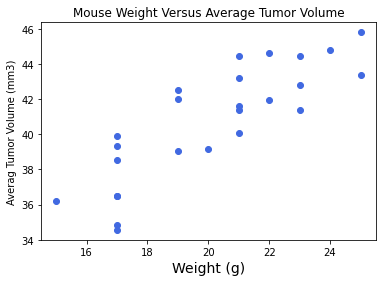

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


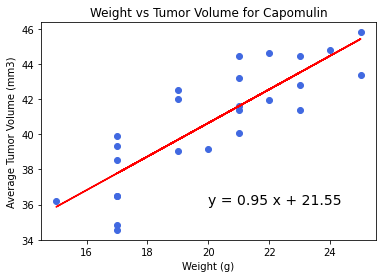

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()